In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.optimizers import RMSprop
import imghdr
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

/var/folders/fv/y6x7n7ls3g901b1zd6v7_g480000gn/T/ipykernel_3925/2584062247.py:9: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
data_dir = '/Users/zahidlaguna/Desktop/TrainingData'
img_ext = ['jpeg','jpg', 'bmp', 'png']

In [3]:
for image_name in os.listdir(data_dir):
    if os.path.isfile(os.path.join(data_dir, image_name)) and imghdr.what(os.path.join(data_dir, image_name)) not in img_ext:
        print(image_name)
        os.remove(os.path.join(data_dir, image_name))

In [4]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir
)

Found 34 files belonging to 2 classes.


In [5]:
data_iterator = data.as_numpy_iterator()
while True:
    try:
        batch = data_iterator.next()
        break
    except tf.errors.InvalidArgumentError as e:
        if 'decode_image/DecodeImage' in str(e):
            # skip over the file that is not in a supported format
            continue
        else:
            raise e


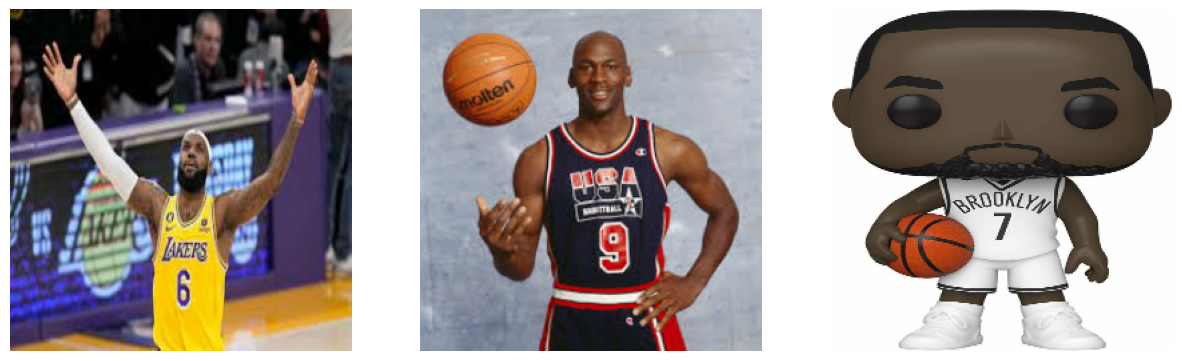

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(15, 15))
for i in range(3):
    ax[i].imshow(batch[0][i].astype("uint8"))
    ax[i].axis("off")
plt.show()

In [7]:
while True:
    try:
        batch = data_iterator.next()
        batch = (batch[0]/255, batch[1])
        break
    except tf.errors.InvalidArgumentError as e:
        if 'decode_image/DecodeImage' in str(e):
            # skip over the file that is not in a supported format
            continue
        else:
            raise e
batch


(array([[[[0.00523897, 0.03748468, 0.08716299],
          [0.00446131, 0.03373281, 0.08379768],
          [0.00306971, 0.02701895, 0.07777555],
          ...,
          [0.1033701 , 0.05646135, 0.11136331],
          [0.09295343, 0.04650855, 0.10141051],
          [0.08713235, 0.04094669, 0.09584865]],
 
         [[0.01567096, 0.05882353, 0.12026654],
          [0.01295597, 0.05338901, 0.11328125],
          [0.00809757, 0.04366407, 0.10078125],
          ...,
          [0.0501685 , 0.01082357, 0.06175537],
          [0.03975184, 0.00805664, 0.05481364],
          [0.03393076, 0.00651042, 0.05093444]],
 
         [[0.        , 0.02967218, 0.10070466],
          [0.        , 0.02604765, 0.09591591],
          [0.        , 0.01956165, 0.08734658],
          ...,
          [0.01485955, 0.        , 0.03477352],
          [0.01230421, 0.        , 0.03453752],
          [0.01087623, 0.        , 0.03440564]],
 
         ...,
 
         [[0.9620404 , 0.85704654, 0.7890472 ],
          [0.96114

In [8]:
train_size = int(0.8 * 1000)
val_size = int(0.1 * 1000)
test_size = int(0.1 * 1000)

In [9]:
train_size

800

In [10]:
train = batch[0][:train_size]
train_labels = batch[1][:train_size]
val = batch[0][train_size:train_size+val_size]
val_labels = batch[1][train_size:train_size+val_size]
test = batch[0][train_size+val_size:]
test_labels = batch[1][train_size+val_size:]

In [11]:
train.shape

(1, 256, 256, 3)

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0